# XD Strategy: Maximizing Dividend Profits with Smart Timing

Welcome to this notebook on the **XD Strategy**—a systematic approach for investors aiming to maximize returns from dividend-paying stocks.

## What is the XD Strategy?

The XD Strategy focuses on:
- **Selecting stocks** with high dividend yields.
- **Buying** these stocks **one month before or two months** their XD (ex-dividend) date.
- **Selling** the stocks **about one week before** the XD date to capture price appreciation as investors anticipate the upcoming dividend.
- **Close Positioning** when we get 5% profit or close position before xd date 1 week

By following this approach, we aim to benefit from both the expected dividend and the price movement leading up to the XD date, while minimizing the risk of price drops after the dividend is paid.

Let's explore how to implement this strategy step by step!

In [ ]:
!pip install ezyquant

In [2]:
# import
import ezyquant as ez
from ezyquant.backtesting.account import SETAccount
from ezyquant.backtesting import Context

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# connect to database
database_path = "C:\\Users\\siraw\\Downloads\\ezyquant\\ezyquant.db"
ez.connect_sqlite(database_path)

In [4]:
# data reader 
ssc = ez.SETSignalCreator(
   start_date="2015-01-01", # วันที่ต้องการเริ่มดึง data
   end_date="2025-06-01", # วันที่สิ้นสุดการดึง data
   index_list=['SET'], # list index ที่ต้องการจะดึงข้อมูล ถ้าไม่ต้องการให้ใส่ list ว่าง
   symbol_list= ['TISCO'] # list หุ้นที่ต้องการจะดึง ถ้าไม่ต้องการให้ใส่ list ว่าง
)

In [6]:
df = ssc.get_data(
    field="dividend", timeframe="daily"
)

In [7]:
df

,2S,3BBIF,3K-BAT,A,A5,AAI,AAV,ABPIF,ACC,ACE,...,WPH,WR,WSOL,XBIO,XPG,XYZ,YCI,YNP,ZAA,ZEN
2015-01-05,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-06,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-07,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-08,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
2015-01-09,2013-12-31 00:00:00,NaN,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2014-06-30 00:00:00,2014-07-31 00:00:00,NaN,...,NaN,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2013-12-31 00:00:00,NaN,2013-12-31 00:00:00,2010-12-31 00:00:00,2013-12-31 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-27,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-28,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00
2025-05-29,2024-12-31 00:00:00,2025-03-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,...,2024-12-31 00:00:00,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,NaN,NaN,2024-12-31 00:00:00,2024-12-31 00:00:00


In [8]:
stocks = ['TISCO','EGCO','KKP','KGI','KYE','PSL','DCC','DIF','BAREIT','CPNREIT']

In [16]:
selected = [s for s in df.columns if s in stocks]
selected_df = df[selected]
selected_df

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-06,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-07,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-08,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-09,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-27,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-28,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00
2025-05-29,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2025-03-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-12-31 00:00:00,2024-03-31 00:00:00,NaN,2024-12-31 00:00:00


In [25]:
df_unique_dates = selected_df.copy()
for col in df_unique_dates.columns:
    df_unique_dates.loc[df_unique_dates[col].duplicated(), col] = np.nan
df_unique_dates

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,2014-09-30 00:00:00,NaN,2014-06-30 00:00:00,2013-12-31 00:00:00,NaN,2014-03-31 00:00:00,2014-09-30 00:00:00,2013-12-31 00:00:00
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For testing, I will choose 'TISCO'

In [17]:
close_df = ssc.get_data(
    field="close", timeframe="daily"
)

In [18]:
selected_close_df = close_df[selected]
selected_close_df

,BAREIT,CPNREIT,DCC,DIF,EGCO,KGI,KKP,KYE,PSL,TISCO
2015-01-05,NaN,NaN,3.578125,10.70,163.0,3.50,38.50,260.0,10.3904,43.25
2015-01-06,NaN,NaN,3.562500,10.70,160.5,3.50,39.50,260.0,10.2376,43.50
2015-01-07,NaN,NaN,3.531250,10.70,163.0,3.58,39.00,262.0,10.2376,44.00
2015-01-08,NaN,NaN,3.562500,10.60,168.5,3.68,39.50,261.0,10.4668,45.25
2015-01-09,NaN,NaN,3.593750,10.70,164.0,3.72,39.75,262.0,11.1544,45.50
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,9.30,12.1,1.550000,8.05,109.0,3.80,47.00,315.0,6.4000,98.00
2025-05-27,9.30,12.1,1.520000,8.05,107.5,3.72,46.25,316.0,6.3500,97.75
2025-05-28,9.30,11.9,1.500000,8.10,107.5,3.80,46.00,320.0,6.2500,98.00
2025-05-29,9.30,12.0,1.500000,8.15,107.5,3.84,46.25,323.0,6.4500,97.75


In [19]:
closed_tisco = selected_close_df['TISCO']
closed_tisco

2015-01-05    43.25
2015-01-06    43.50
2015-01-07    44.00
2015-01-08    45.25
2015-01-09    45.50
              ...  
2025-05-26    98.00
2025-05-27    97.75
2025-05-28    98.00
2025-05-29    97.75
2025-05-30    97.50
Name: TISCO, Length: 2532, dtype: float64

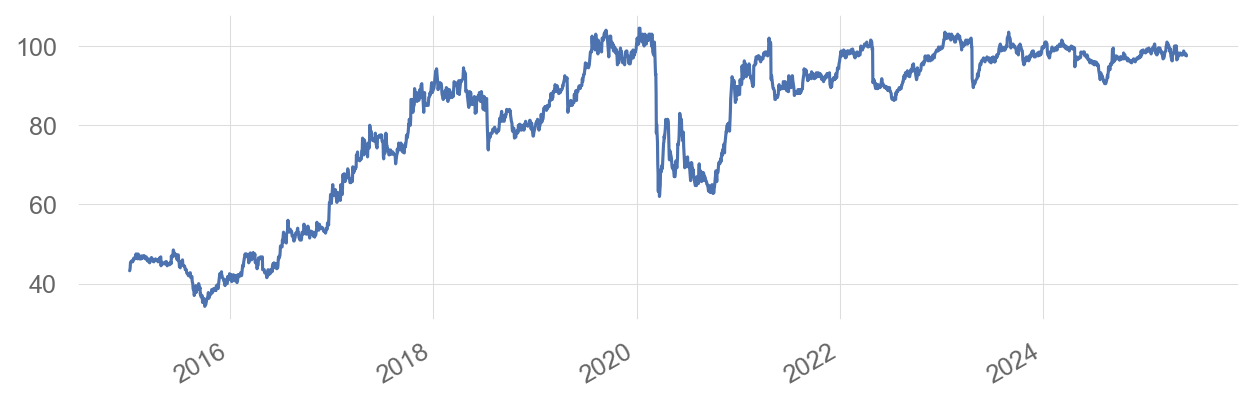

In [23]:
# plot tisco graph
plt.figure(figsize=(10,3),dpi=150)
selected_close_df['TISCO'].plot(label='Adj Close')
plt.show()

we will get unique xd date of 'TISCO'

In [27]:
xd_tisco = df_unique_dates['TISCO'].dropna()
xd_tisco

2015-01-05    2013-12-31 00:00:00
2015-02-18    2014-12-31 00:00:00
2016-02-24    2015-12-31 00:00:00
2017-02-20    2016-12-31 00:00:00
2018-02-28    2017-12-31 00:00:00
2019-02-28    2018-12-31 00:00:00
2020-02-27    2019-12-31 00:00:00
2021-03-01    2020-12-31 00:00:00
2022-03-02    2021-12-31 00:00:00
2023-02-23    2022-12-31 00:00:00
2023-08-28    2023-06-30 00:00:00
2024-02-28    2023-12-31 00:00:00
2024-08-29    2024-06-30 00:00:00
2025-02-26    2024-12-31 00:00:00
Name: TISCO, dtype: object